<a href="https://colab.research.google.com/github/realalyeasin/PyCaret/blob/main/%F0%9F%9A%80PyCaret_II_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
from pycaret.datasets import get_data
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 5)

In [5]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)

print("Data for modeling : "+ str(data.shape))
print("Unseen data for prediction : "+ str(data_unseen.shape))

Data for modeling : (135, 5)
Unseen data for prediction : (15, 5)


In [6]:
from pycaret.classification import *
mclf = setup( data = data, session_id = 123, target='species' )

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9678,0.9963,0.9667,0.9758,0.9669,0.9515,0.9560,0.014
nb,Naive Bayes,0.9578,0.9897,0.9556,0.9713,0.9546,0.9364,0.9442,0.015
qda,Quadratic Discriminant Analysis,0.9567,1.0000,0.9556,0.9708,0.9533,0.9348,0.9433,0.016
lr,Logistic Regression,0.9478,0.9963,0.9444,0.9638,0.9444,0.9212,0.9304,0.306
knn,K Neighbors Classifier,0.9467,0.9926,0.9444,0.9630,0.9432,0.9197,0.9291,0.116
lightgbm,Light Gradient Boosting Machine,0.9456,0.9852,0.9444,0.9625,0.9419,0.9182,0.9282,0.080
ada,Ada Boost Classifier,0.9256,0.9809,0.9222,0.9505,0.9194,0.8879,0.9026,0.088
gbc,Gradient Boosting Classifier,0.9256,0.9815,0.9222,0.9505,0.9194,0.8879,0.9026,0.190
et,Extra Trees Classifier,0.9256,0.9926,0.9222,0.9505,0.9194,0.8879,0.9026,0.412
dt,Decision Tree Classifier,0.9144,0.9369,0.9111,0.9366,0.9086,0.8712,0.8843,0.014


In [8]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [9]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [10]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [12]:
tunned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


In [14]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


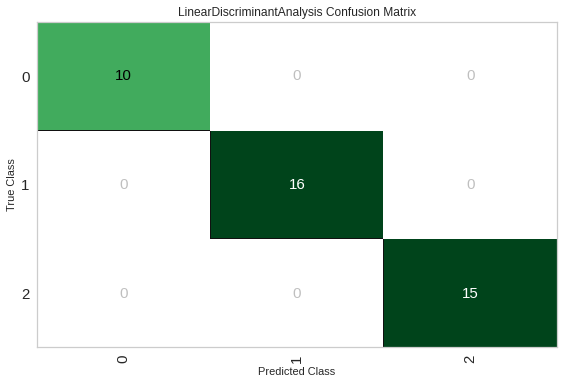

In [15]:
plot_model(tunned_lda, plot='confusion_matrix')

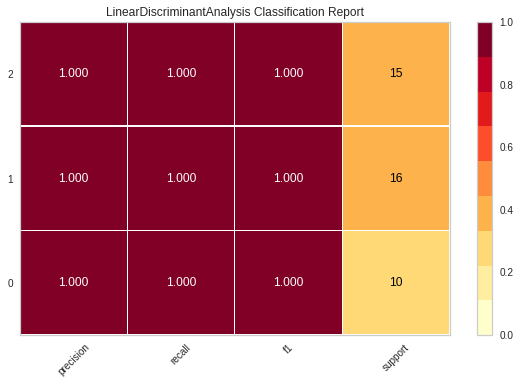

In [16]:
plot_model(tunned_lda, plot='class_report')

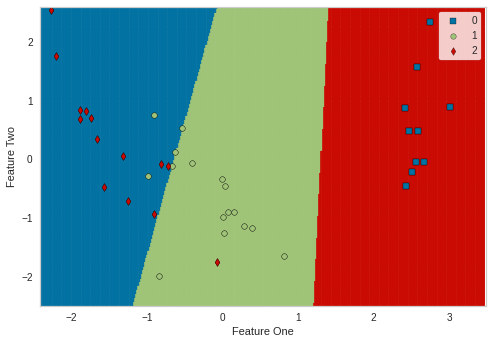

In [17]:
plot_model(tunned_lda, plot='boundary')

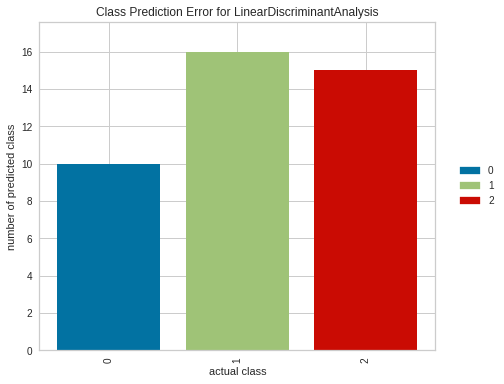

In [18]:
plot_model(tunned_lda, plot='error')

In [19]:
evaluate_model(tunned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
predict_model(tunned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
final = finalize_model(tunned_lda)

In [23]:
print(final)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)


In [25]:
unseen_predictions = predict_model(final, data=data_unseen)

In [26]:
unseen_predictions

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0000
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.9942
5,5.6,2.9,3.6,1.3,Iris-versicolor,Iris-versicolor,1.0000
6,5.5,2.4,3.7,1.0,Iris-versicolor,Iris-versicolor,1.0000
7,6.3,2.3,4.4,1.3,Iris-versicolor,Iris-versicolor,0.9992
8,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica,0.9982
9,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,0.9998
